In [1]:
import pandas as pd
import numpy as np

In [2]:
base_path = "../nanodiag_datasets/GSE175758/"

In [3]:
df_merged_signals = pd.read_csv(base_path + "merged_signals.csv", sep="\t")
df_merged_signals

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y.1,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
1,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
3,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
4,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
5,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
6,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
7,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
9,0.000000,0.662734,0.662734,0.000000,0.000000,0.000000,0.297521,0.000000,0.606316,0.606316,...,0.148856,0.105178,0.036514,0.145285,0.151303,0.054057,0.076587,0.067460,0.187142,1


In [30]:
df_merged_signals.dtypes

cg00035864_TTTY18        float64
cg00050873_TSPY4         float64
cg00050873_FAM197Y2      float64
cg00061679_DAZ1          float64
cg00061679_DAZ4          float64
                          ...   
ch.22.740407F_RANGAP1    float64
ch.22.757911F_XRCC6      float64
ch.22.772318F_NAGA       float64
ch.22.909671F_ATXN10     float64
treatment_label            int64
Length: 461275, dtype: object

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [5]:
labels = df_merged_signals["treatment_label"]
features = df_merged_signals.drop(columns=["treatment_label"])

n_out_features = 100

reduced_features = SelectKBest(f_classif, k=n_out_features).fit_transform(features, labels)

In [6]:
reduced_features.shape

(50, 100)

/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-08 15:24:03.247336: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 15:24:03.315950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 15:24:03.316035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 15:24:03.320000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register fa

<Axes: >

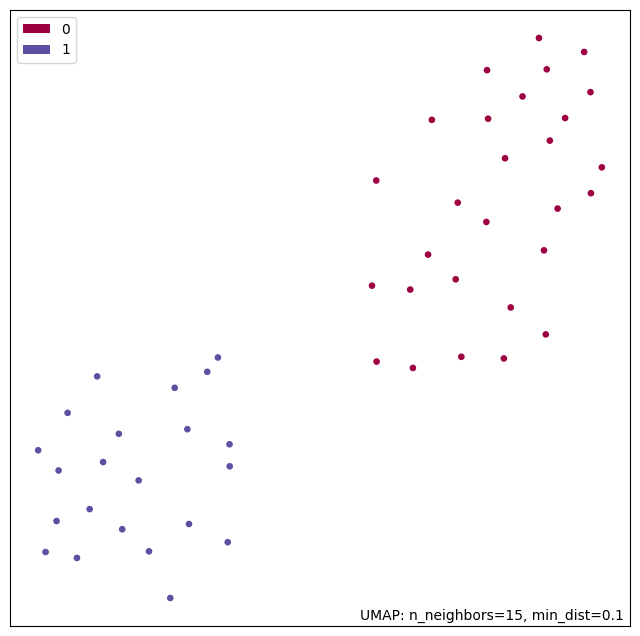

In [7]:
import umap
import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

mapper = umap.UMAP().fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=labels)

In [31]:
model_selectkfeatures = SelectKBest(f_classif, k=n_out_features).fit(features, labels)
model_selectkfeatures.get_feature_names_out()

array(['cg04730443_MAGEB6', 'cg26965953_IRS4', 'cg00086243_TNFRSF18',
       'cg00746981_HDGF', 'cg00746981_HDGF.1', 'cg03136646_MMP23A',
       'cg03136646_MMP23B', 'cg03970567_ATF3', 'cg08700651_IL28RA',
       'cg11816923_PTPN14', 'cg17220055_HIVEP3', 'cg25593625_MYOM3',
       'cg26661034_PAX7', 'cg26824678_CAPZB', 'cg02893453_SIX2',
       'cg05853130_THSD7B', 'cg19927457_FSHR', 'cg20215622_ERBB4',
       'cg24441922_ARL4C', 'cg24441922_ARL4C.1', 'cg01102073_GATA2',
       'cg05258757_ROPN1B', 'cg06796779_GATA2', 'cg09852607_GATA2',
       'cg11198596_LRIG1', 'cg11431957_VILL', 'cg12223004_CACNA2D3',
       'cg12462883_SLC9A10', 'cg19544746_ACOX3', 'cg27348423_C4orf19',
       'cg03504078_PCDHB3', 'cg18071348_LOC285692', 'cg01758512_FUT9',
       'cg01758512_FUT9.1', 'cg02764478_SIM1', 'cg16507569_COL11A2',
       'cg22788223_NFYA', 'cg22788223_C6orf130', 'cg24351167_PHACTR1',
       'cg00399951_NXPH1', 'cg02286663_TFR2', 'cg09263325_LOC389458',
       'cg10276834_CHRM2', 'cg18071

# Feature selection

In [32]:
from sklearn.model_selection import train_test_split

n_out_features = 100
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25, 461274), (25, 461274), (25,), (25,))

In [33]:
model_selectkfeatures_train = SelectKBest(f_classif, k=n_out_features).fit(X_train, y_train)
model_selectkfeatures_train.get_feature_names_out()

array(['cg26965953_IRS4', 'cg00746981_HDGF', 'cg00746981_HDGF.1',
       'cg01485998_VASH2', 'cg01485998_VASH2.1', 'cg03136646_MMP23A',
       'cg03136646_MMP23B', 'cg25593625_MYOM3', 'cg02893453_SIX2',
       'cg03181376_ZFP36L2', 'cg03181376_LOC100129726',
       'cg17924218_SCN9A', 'cg17924218_SCN9A.1', 'cg20195812_STAT4',
       'cg20195812_STAT4.1', 'cg24441922_ARL4C', 'cg24441922_ARL4C.1',
       'cg22471230_MME', 'cg22471230_MME.1', 'cg22471230_MME.2',
       'cg22471230_MME.3', 'cg13028471_SLC7A11', 'cg20111875_LOC641518',
       'cg04552346_TCF7', 'cg04552346_TCF7.1', 'cg12517452_ITGA1',
       'cg12517452_PELO', 'cg12517452_PELO.1', 'cg16585682_SCGB3A1',
       'cg25668236_ST8SIA4', 'cg11963660_RNF39', 'cg15119316_RAB23',
       'cg15119316_RAB23.1', 'cg16499284_LOC222699', 'cg16507569_COL11A2',
       'cg18188377_PRR3', 'cg18188377_GNL1', 'cg18188377_GNL1.1',
       'cg22788223_NFYA', 'cg22788223_C6orf130', 'cg23505644_CDSN',
       'cg23505644_PSORS1C1', 'cg23524294_HIST1H2

In [34]:
test_transformed_features = model_selectkfeatures_train.transform(X_test)
test_transformed_features.shape

(25, 100)

# Pipeline evaluation

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

clf_selected = make_pipeline(
    SelectKBest(f_classif, k=n_out_features), MinMaxScaler(), LinearSVC(dual="auto")
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

Classification accuracy without selecting features: 0.800
Classification accuracy after univariate feature selection: 0.920


In [51]:
y_pred = clf_selected.predict(X_test)
y_pred.shape

(25,)

In [37]:
best_features = clf_selected[:-1].get_feature_names_out()

In [38]:
best_gene_features = ",".join([item.split("_")[1] for item in best_features])
best_gene_features

'IRS4,HDGF,HDGF.1,VASH2,VASH2.1,MMP23A,MMP23B,MYOM3,SIX2,ZFP36L2,LOC100129726,SCN9A,SCN9A.1,STAT4,STAT4.1,ARL4C,ARL4C.1,MME,MME.1,MME.2,MME.3,SLC7A11,LOC641518,TCF7,TCF7.1,ITGA1,PELO,PELO.1,SCGB3A1,ST8SIA4,RNF39,RAB23,RAB23.1,LOC222699,COL11A2,PRR3,GNL1,GNL1.1,NFYA,C6orf130,CDSN,PSORS1C1,HIST1H2BD,MOGAT3,EGFR,DDX56,TMEM176B,TMEM176A,TMEM176B.1,SKAP2,PINX1,MIR1322,CRH,TRAPPC9,FLJ41350,LBX1,PCDH21,FNBP4,CWF19L2,CD59,RFX4,PDE3A,SPRY2,KIAA1737,C14orf133,AHSA1,LOC80154,IGDCC4,CDH13,GTF3C1,KIAA0556,ZNF23,GPT2,GPT2.1,RAP1GAP2,GAS7,GAS7.1,FGF11,PMP22,GAS7,GAS7.1,GAS7.2,MYH13,GAS7,GAS7.1,ATP5G1,GAS7,GAS7.1,SOCS6,PVR,LOC284440,C19orf51,ZNF665,TOMM40,EEF1A2,RSPO4,PRNT,ISM1,EBF4,ISM1'

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[13,  0],
       [ 2, 10]])

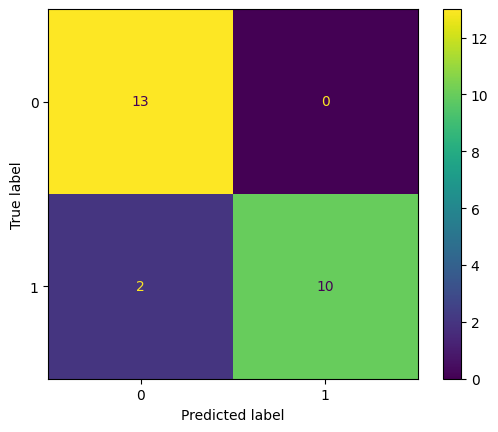

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_selected.classes_)
disp.plot()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



# Selected probes/genes 

In [46]:
feature_names_out = clf_selected[0].get_feature_names_out()
feature_names_out, len(feature_names_out)

(array(['cg26965953_IRS4', 'cg00746981_HDGF', 'cg00746981_HDGF.1',
        'cg01485998_VASH2', 'cg01485998_VASH2.1', 'cg03136646_MMP23A',
        'cg03136646_MMP23B', 'cg25593625_MYOM3', 'cg02893453_SIX2',
        'cg03181376_ZFP36L2', 'cg03181376_LOC100129726',
        'cg17924218_SCN9A', 'cg17924218_SCN9A.1', 'cg20195812_STAT4',
        'cg20195812_STAT4.1', 'cg24441922_ARL4C', 'cg24441922_ARL4C.1',
        'cg22471230_MME', 'cg22471230_MME.1', 'cg22471230_MME.2',
        'cg22471230_MME.3', 'cg13028471_SLC7A11', 'cg20111875_LOC641518',
        'cg04552346_TCF7', 'cg04552346_TCF7.1', 'cg12517452_ITGA1',
        'cg12517452_PELO', 'cg12517452_PELO.1', 'cg16585682_SCGB3A1',
        'cg25668236_ST8SIA4', 'cg11963660_RNF39', 'cg15119316_RAB23',
        'cg15119316_RAB23.1', 'cg16499284_LOC222699', 'cg16507569_COL11A2',
        'cg18188377_PRR3', 'cg18188377_GNL1', 'cg18188377_GNL1.1',
        'cg22788223_NFYA', 'cg22788223_C6orf130', 'cg23505644_CDSN',
        'cg23505644_PSORS1C1', 'cg2

In [55]:
lst_probes = list()
lst_genes = list()
lst_probe_genes = list()

for item in feature_names_out:
    p_g = item.split("_")
    lst_probes.append(p_g[0])
    lst_genes.append(p_g[1])
    lst_probe_genes.append(item)

df_probes_genes = pd.DataFrame(zip(lst_probes, lst_genes, lst_probe_genes), columns=["ProbeID", "Genes", "Combined"])
df_probes_genes = df_probes_genes.sort_values(by=["ProbeID"])
df_probes_genes

,ProbeID,Genes,Combined
94,cg00410872,EEF1A2,cg00410872_EEF1A2
66,cg00614314,LOC80154,cg00614314_LOC80154
1,cg00746981,HDGF,cg00746981_HDGF
2,cg00746981,HDGF.1,cg00746981_HDGF.1
95,cg00862894,RSPO4,cg00862894_RSPO4
...,...,...,...
0,cg26965953,IRS4,cg26965953_IRS4
87,cg26996616,GAS7.1,cg26996616_GAS7.1
86,cg26996616,GAS7,cg26996616_GAS7
99,cg27427234,ISM1,cg27427234_ISM1


In [49]:
df_probes_genes.to_csv(base_path + "df_probes_genes_linearSVC.csv", sep="\t", index=None)

In [85]:
df_patient_names = pd.read_csv(base_path + "final_patient_names.csv", sep="\t")

df_d0_patients = None
df_d8_patients = None

for i, rname in df_patient_names.iterrows():
    if "d0" in rname["PatientIDs"]:
        if df_d0_patients is None:
            df_d0_patients = df_merged_signals.loc[i]
        else:
            df_d0_patients = pd.concat([df_d0_patients, df_merged_signals.loc[i]], axis=1)
    if "d8" in rname["PatientIDs"]:
        if df_d8_patients is None:
            df_d8_patients = df_merged_signals.loc[i]
        else:
            df_d8_patients = pd.concat([df_d8_patients, df_merged_signals.loc[i]], axis=1)

In [86]:
df_d0_patients

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cg00035864_TTTY18,0.000000,0.270480,0.000000,0.101402,0.354877,0.253903,0.076049,0.096294,0.000000,0.000000,...,0.082780,0.127119,0.111988,0.000000,0.000000,0.070550,0.064086,0.000000,0.000000,0.115742
cg00050873_TSPY4,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.662734,...,0.879949,0.859391,0.828636,0.000000,0.000000,0.897566,0.832545,0.627883,0.000000,0.839830
cg00050873_FAM197Y2,0.000000,0.902194,0.000000,0.838766,0.857989,0.874939,0.869502,0.930536,0.000000,0.662734,...,0.879949,0.859391,0.828636,0.000000,0.000000,0.897566,0.832545,0.627883,0.000000,0.839830
cg00061679_DAZ1,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.000000,...,0.652352,0.750900,0.648517,0.000000,0.000000,0.776561,0.711087,0.000000,0.000000,0.584354
cg00061679_DAZ4,0.000000,0.569973,0.000000,0.518102,0.755372,0.618917,0.673679,0.822343,0.000000,0.000000,...,0.652352,0.750900,0.648517,0.000000,0.000000,0.776561,0.711087,0.000000,0.000000,0.584354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.740407F_RANGAP1,0.024772,0.044178,0.061292,0.060053,0.079270,0.052819,0.028928,0.092773,0.061288,0.054057,...,0.062650,0.054786,0.028216,0.042694,0.074176,0.035092,0.042447,0.048533,0.089098,0.134698
ch.22.757911F_XRCC6,0.033721,0.058824,0.060908,0.075126,0.060212,0.073456,0.037033,0.067895,0.065006,0.076587,...,0.066028,0.059800,0.051662,0.063120,0.059547,0.053990,0.047551,0.049042,0.075410,0.091254
ch.22.772318F_NAGA,0.050619,0.035193,0.066473,0.070458,0.051502,0.059917,0.034346,0.066007,0.063020,0.067460,...,0.060386,0.097288,0.017705,0.059157,0.102607,0.058350,0.050331,0.046374,0.088527,0.085356
ch.22.909671F_ATXN10,0.156485,0.129464,0.164508,0.153665,0.111945,0.237092,0.078823,0.167633,0.174391,0.187142,...,0.176172,0.133189,0.121157,0.173333,0.148788,0.086686,0.159876,0.145133,0.147771,0.240715


In [87]:
df_d8_patients

,25,26,27,28,29,30,31,32,33,34,...,40,41,42,43,44,45,46,47,48,49
cg00035864_TTTY18,0.311573,0.247154,0.000000,0.077089,0.304910,0.384013,0.074620,0.075719,0.000000,0.000000,...,0.098427,0.075890,0.121551,0.000000,0.000000,0.067011,0.075112,0.000000,0.000000,0.109047
cg00050873_TSPY4,0.924252,0.708998,0.000000,0.607633,0.705648,0.877507,0.713226,0.715766,0.739022,0.000000,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
cg00050873_FAM197Y2,0.924252,0.708998,0.000000,0.607633,0.705648,0.877507,0.713226,0.715766,0.739022,0.000000,...,0.706994,0.707074,0.695249,0.000000,0.000000,0.615115,0.631633,0.000000,0.000000,0.661799
cg00061679_DAZ1,0.543046,0.481037,0.000000,0.352750,0.562231,0.630435,0.439207,0.516375,0.000000,0.000000,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
cg00061679_DAZ4,0.543046,0.481037,0.000000,0.352750,0.562231,0.630435,0.439207,0.516375,0.000000,0.000000,...,0.595303,0.603221,0.476104,0.000000,0.000000,0.426690,0.506751,0.000000,0.000000,0.475882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.740407F_RANGAP1,0.021460,0.034561,0.067857,0.057031,0.072867,0.049464,0.034535,0.078468,0.039053,0.058058,...,0.080132,0.045780,0.045548,0.046595,0.074469,0.031138,0.062139,0.046007,0.078053,0.121939
ch.22.757911F_XRCC6,0.032364,0.041305,0.062103,0.054332,0.057262,0.078864,0.047740,0.080864,0.022343,0.074934,...,0.097816,0.058907,0.047376,0.051179,0.074141,0.035893,0.060393,0.040513,0.079559,0.095393
ch.22.772318F_NAGA,0.052306,0.072315,0.055106,0.053456,0.076280,0.076530,0.047828,0.070002,0.038852,0.056955,...,0.097023,0.081949,0.055852,0.057661,0.080806,0.048295,0.062613,0.052525,0.087022,0.100206
ch.22.909671F_ATXN10,0.166247,0.182755,0.148132,0.150395,0.119263,0.132350,0.082147,0.200186,0.077787,0.163159,...,0.299832,0.130351,0.093185,0.155358,0.183242,0.160279,0.127255,0.143050,0.138374,0.286918


In [88]:
df_d0_patients = df_d0_patients.transpose()
df_d0_patients = df_d0_patients.astype({"treatment_label": 'int'})
#df_d0_patients['treatment_label']

0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    0
11    1
12    1
13    0
14    1
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
Name: treatment_label, dtype: int64

In [91]:
df_d8_patients = df_d8_patients.transpose()
df_d8_patients = df_d8_patients.astype({"treatment_label": 'int'})
#df_d8_patients['treatment_label']

25    0
26    1
27    1
28    1
29    0
30    1
31    1
32    0
33    0
34    1
35    0
36    1
37    1
38    0
39    1
40    1
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    1
Name: treatment_label, dtype: int64

In [95]:
colnames = df_probes_genes["Combined"].tolist()
colnames.append("treatment_label")
df_d0_patients_filtered_genes = df_d0_patients[colnames]
df_d0_patients_filtered_genes

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
0,0.025244,0.112773,0.064507,0.064507,0.096193,0.045297,0.038105,0.038105,0.057797,0.096496,...,0.046691,0.040038,0.032897,0.110421,0.435904,0.095034,0.095034,0.035993,0.063072,0
1,0.088005,0.180902,0.090646,0.090646,0.488066,0.079083,0.076506,0.076506,0.085659,0.421091,...,0.067869,0.100860,0.044136,0.942097,0.336031,0.873110,0.873110,0.090481,0.090085,1
2,0.086416,0.235088,0.086428,0.086428,0.417763,0.167303,0.056219,0.056219,0.196228,0.389568,...,0.092677,0.099867,0.072379,0.914914,0.168319,0.772947,0.772947,0.150125,0.087194,1
3,0.060268,0.220696,0.087547,0.087547,0.558658,0.048162,0.054839,0.054839,0.198137,0.400582,...,0.087338,0.087717,0.040497,0.124190,0.129378,0.809935,0.809935,0.092577,0.095420,1
4,0.046652,0.115279,0.063731,0.063731,0.389170,0.064470,0.046175,0.046175,0.056303,0.231590,...,0.070132,0.060544,0.026567,0.074020,0.633071,0.769815,0.769815,0.040838,0.075807,0
5,0.048340,0.261656,0.090576,0.090576,0.487816,0.167070,0.064579,0.064579,0.073983,0.469846,...,0.068886,0.077274,0.059104,0.102143,0.372835,0.763681,0.763681,0.054155,0.086481,1
6,0.041053,0.141387,0.062198,0.062198,0.148036,0.050895,0.038888,0.038888,0.054356,0.115188,...,0.044497,0.043121,0.041540,0.164740,0.146413,0.119882,0.119882,0.037265,0.068410,1
7,0.047845,0.155237,0.081202,0.081202,0.194360,0.073383,0.050428,0.050428,0.147894,0.218415,...,0.061254,0.069247,0.028373,0.085016,0.356637,0.416768,0.416768,0.044042,0.072053,0
8,0.043754,0.113743,0.068665,0.068665,0.432158,0.055318,0.053789,0.053789,0.064412,0.206347,...,0.066433,0.056691,0.030969,0.091254,0.484159,0.271043,0.271043,0.040675,0.105144,0
9,0.049706,0.113214,0.102485,0.102485,0.499385,0.049300,0.049984,0.049984,0.045534,0.366828,...,0.058296,0.062600,0.030012,0.409309,0.757256,0.755165,0.755165,0.048538,0.080995,1


In [97]:
df_d0_patients_filtered_genes_respond = df_d0_patients_filtered_genes[df_d0_patients_filtered_genes["treatment_label"] == 1]
df_d0_patients_filtered_genes_respond

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
1,0.088005,0.180902,0.090646,0.090646,0.488066,0.079083,0.076506,0.076506,0.085659,0.421091,...,0.067869,0.100860,0.044136,0.942097,0.336031,0.873110,0.873110,0.090481,0.090085,1
2,0.086416,0.235088,0.086428,0.086428,0.417763,0.167303,0.056219,0.056219,0.196228,0.389568,...,0.092677,0.099867,0.072379,0.914914,0.168319,0.772947,0.772947,0.150125,0.087194,1
3,0.060268,0.220696,0.087547,0.087547,0.558658,0.048162,0.054839,0.054839,0.198137,0.400582,...,0.087338,0.087717,0.040497,0.124190,0.129378,0.809935,0.809935,0.092577,0.095420,1
5,0.048340,0.261656,0.090576,0.090576,0.487816,0.167070,0.064579,0.064579,0.073983,0.469846,...,0.068886,0.077274,0.059104,0.102143,0.372835,0.763681,0.763681,0.054155,0.086481,1
6,0.041053,0.141387,0.062198,0.062198,0.148036,0.050895,0.038888,0.038888,0.054356,0.115188,...,0.044497,0.043121,0.041540,0.164740,0.146413,0.119882,0.119882,0.037265,0.068410,1
9,0.049706,0.113214,0.102485,0.102485,0.499385,0.049300,0.049984,0.049984,0.045534,0.366828,...,0.058296,0.062600,0.030012,0.409309,0.757256,0.755165,0.755165,0.048538,0.080995,1
11,0.098934,0.282116,0.107984,0.107984,0.402710,0.184679,0.071326,0.071326,0.219261,0.373568,...,0.067959,0.068459,0.055751,0.937711,0.231719,0.845012,0.845012,0.088689,0.061222,1
12,0.055701,0.143855,0.079191,0.079191,0.171527,0.224202,0.055238,0.055238,0.056057,0.304099,...,0.065991,0.067657,0.030289,0.085718,0.124453,0.087460,0.087460,0.049888,0.068588,1
14,0.082191,0.241563,0.078301,0.078301,0.154281,0.099771,0.060907,0.060907,0.067256,0.621726,...,0.071714,0.080095,0.054064,0.081620,0.763581,0.816456,0.816456,0.075143,0.091907,1
15,0.079023,0.162783,0.065681,0.065681,0.433606,0.048931,0.052528,0.052528,0.193974,0.383533,...,0.063103,0.053009,0.040930,0.927597,0.200940,0.834132,0.834132,0.060316,0.064971,1


In [106]:
day_0_respond_mean_methylation = np.median(df_d0_patients_filtered_genes_respond)
day_0_respond_mean_methylation

0.0923774150679797

In [107]:
df_d0_patients_filtered_genes_not_respond = df_d0_patients_filtered_genes[df_d0_patients_filtered_genes["treatment_label"] == 0]
df_d0_patients_filtered_genes_not_respond

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
0,0.025244,0.112773,0.064507,0.064507,0.096193,0.045297,0.038105,0.038105,0.057797,0.096496,...,0.046691,0.040038,0.032897,0.110421,0.435904,0.095034,0.095034,0.035993,0.063072,0
4,0.046652,0.115279,0.063731,0.063731,0.389170,0.064470,0.046175,0.046175,0.056303,0.231590,...,0.070132,0.060544,0.026567,0.074020,0.633071,0.769815,0.769815,0.040838,0.075807,0
7,0.047845,0.155237,0.081202,0.081202,0.194360,0.073383,0.050428,0.050428,0.147894,0.218415,...,0.061254,0.069247,0.028373,0.085016,0.356637,0.416768,0.416768,0.044042,0.072053,0
8,0.043754,0.113743,0.068665,0.068665,0.432158,0.055318,0.053789,0.053789,0.064412,0.206347,...,0.066433,0.056691,0.030969,0.091254,0.484159,0.271043,0.271043,0.040675,0.105144,0
10,0.044198,0.118528,0.071166,0.071166,0.179649,0.082280,0.037021,0.037021,0.048867,0.158560,...,0.062072,0.042281,0.023010,0.043521,0.752653,0.791252,0.791252,0.040694,0.087333,0
13,0.057342,0.250759,0.078576,0.078576,0.160635,0.092605,0.075856,0.075856,0.063418,0.177158,...,0.056503,0.060566,0.031454,0.065951,0.600405,0.429705,0.429705,0.058454,0.063165,0
16,0.097443,0.138137,0.088471,0.088471,0.356204,0.053667,0.070586,0.070586,0.061274,0.754822,...,0.083712,0.067025,0.041649,0.092898,0.844633,0.128500,0.128500,0.075157,0.093135,0
17,0.037826,0.144170,0.080142,0.080142,0.153888,0.040874,0.060319,0.060319,0.057982,0.124579,...,0.061229,0.059903,0.021844,0.047265,0.829421,0.084910,0.084910,0.049954,0.067638,0
18,0.053124,0.150698,0.068616,0.068616,0.187741,0.042338,0.043800,0.043800,0.101004,0.385253,...,0.049414,0.052895,0.035152,0.066438,0.795553,0.195371,0.195371,0.052748,0.063302,0
19,0.073639,0.131276,0.074450,0.074450,0.365883,0.059791,0.051887,0.051887,0.048534,0.288602,...,0.061028,0.057093,0.026316,0.063771,0.787915,0.094338,0.094338,0.058669,0.069717,0


In [108]:
day_0_not_respond_mean_methylation = np.median(df_d0_patients_filtered_genes_not_respond)
day_0_not_respond_mean_methylation

0.0737557721908671

In [109]:
df_d8_patients_filtered_genes = df_d8_patients[colnames]
df_d8_patients_filtered_genes

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
25,0.042066,0.065468,0.058743,0.058743,0.098935,0.035918,0.059592,0.059592,0.042815,0.079223,...,0.040547,0.040155,0.026095,0.074915,0.404925,0.073791,0.073791,0.038734,0.051307,0
26,0.057657,0.197598,0.118870,0.118870,0.481742,0.117077,0.066726,0.066726,0.069293,0.448435,...,0.058774,0.095281,0.039798,0.929283,0.350686,0.768318,0.768318,0.120947,0.084055,1
27,0.068421,0.275393,0.099984,0.099984,0.450482,0.168741,0.060704,0.060704,0.206270,0.457059,...,0.075080,0.117334,0.074421,0.889499,0.201405,0.729286,0.729286,0.168180,0.094211,1
28,0.047353,0.184516,0.077959,0.077959,0.493524,0.045755,0.055504,0.055504,0.212596,0.379537,...,0.071561,0.102336,0.045261,0.093297,0.107805,0.570709,0.570709,0.068835,0.085041,1
29,0.028483,0.112849,0.065879,0.065879,0.426748,0.057813,0.049634,0.049634,0.061228,0.243557,...,0.038984,0.058066,0.022566,0.032959,0.548190,0.704945,0.704945,0.035837,0.059967,0
30,0.049037,0.194377,0.088916,0.088916,0.449876,0.137275,0.060550,0.060550,0.059462,0.450734,...,0.082158,0.072990,0.056241,0.069618,0.373661,0.719292,0.719292,0.057850,0.099395,1
31,0.038627,0.088661,0.070325,0.070325,0.165368,0.051423,0.055441,0.055441,0.056739,0.102726,...,0.056630,0.060183,0.052459,0.092551,0.112603,0.104996,0.104996,0.029205,0.062664,1
32,0.035594,0.102682,0.085450,0.085450,0.172649,0.057034,0.055700,0.055700,0.118051,0.189849,...,0.071476,0.067814,0.019034,0.066514,0.296082,0.370490,0.370490,0.034161,0.098302,0
33,0.033460,0.185316,0.053398,0.053398,0.396466,0.048941,0.039973,0.039973,0.079106,0.180882,...,0.038635,0.053259,0.048422,0.170237,0.366238,0.221267,0.221267,0.042475,0.050461,0
34,0.046038,0.113425,0.095359,0.095359,0.465107,0.048638,0.054176,0.054176,0.057777,0.305853,...,0.066251,0.073466,0.045144,0.299356,0.607975,0.610772,0.610772,0.053872,0.077437,1


In [110]:
df_d8_patients_filtered_genes_respond = df_d8_patients_filtered_genes[df_d8_patients_filtered_genes["treatment_label"] == 1]
df_d8_patients_filtered_genes_respond

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
26,0.057657,0.197598,0.118870,0.118870,0.481742,0.117077,0.066726,0.066726,0.069293,0.448435,...,0.058774,0.095281,0.039798,0.929283,0.350686,0.768318,0.768318,0.120947,0.084055,1
27,0.068421,0.275393,0.099984,0.099984,0.450482,0.168741,0.060704,0.060704,0.206270,0.457059,...,0.075080,0.117334,0.074421,0.889499,0.201405,0.729286,0.729286,0.168180,0.094211,1
28,0.047353,0.184516,0.077959,0.077959,0.493524,0.045755,0.055504,0.055504,0.212596,0.379537,...,0.071561,0.102336,0.045261,0.093297,0.107805,0.570709,0.570709,0.068835,0.085041,1
30,0.049037,0.194377,0.088916,0.088916,0.449876,0.137275,0.060550,0.060550,0.059462,0.450734,...,0.082158,0.072990,0.056241,0.069618,0.373661,0.719292,0.719292,0.057850,0.099395,1
31,0.038627,0.088661,0.070325,0.070325,0.165368,0.051423,0.055441,0.055441,0.056739,0.102726,...,0.056630,0.060183,0.052459,0.092551,0.112603,0.104996,0.104996,0.029205,0.062664,1
34,0.046038,0.113425,0.095359,0.095359,0.465107,0.048638,0.054176,0.054176,0.057777,0.305853,...,0.066251,0.073466,0.045144,0.299356,0.607975,0.610772,0.610772,0.053872,0.077437,1
36,0.071826,0.276791,0.093916,0.093916,0.397572,0.201254,0.068928,0.068928,0.211104,0.343501,...,0.063054,0.077396,0.060241,0.941858,0.217368,0.768039,0.768039,0.127830,0.083361,1
37,0.036867,0.096027,0.070557,0.070557,0.161764,0.160060,0.055081,0.055081,0.069094,0.322976,...,0.061832,0.058720,0.043951,0.054832,0.163186,0.079899,0.079899,0.049766,0.073647,1
39,0.068871,0.247352,0.084069,0.084069,0.144953,0.078220,0.059936,0.059936,0.063360,0.543673,...,0.075887,0.061936,0.053033,0.061561,0.595747,0.670576,0.670576,0.045228,0.093194,1
40,0.089867,0.150810,0.083373,0.083373,0.491345,0.090255,0.059759,0.059759,0.227667,0.436188,...,0.062229,0.062712,0.038983,0.892840,0.252697,0.797765,0.797765,0.055259,0.073472,1


In [111]:
day_8_respond_mean_methylation = np.median(df_d8_patients_filtered_genes_respond)
day_8_respond_mean_methylation

0.0922496060885335

In [112]:
df_d8_patients_filtered_genes_not_respond = df_d8_patients_filtered_genes[df_d8_patients_filtered_genes["treatment_label"] == 0]
df_d8_patients_filtered_genes_not_respond

,cg00410872_EEF1A2,cg00614314_LOC80154,cg00746981_HDGF,cg00746981_HDGF.1,cg00862894_RSPO4,cg01090433_CDH13,cg01485998_VASH2,cg01485998_VASH2.1,cg02146462_RAP1GAP2,cg02258703_MOGAT3,...,cg25668236_ST8SIA4,cg26271948_CD59,cg26387689_PDE3A,cg26769700_TRAPPC9,cg26965953_IRS4,cg26996616_GAS7.1,cg26996616_GAS7,cg27427234_ISM1,cg27534894_TOMM40,treatment_label
25,0.042066,0.065468,0.058743,0.058743,0.098935,0.035918,0.059592,0.059592,0.042815,0.079223,...,0.040547,0.040155,0.026095,0.074915,0.404925,0.073791,0.073791,0.038734,0.051307,0
29,0.028483,0.112849,0.065879,0.065879,0.426748,0.057813,0.049634,0.049634,0.061228,0.243557,...,0.038984,0.058066,0.022566,0.032959,0.548190,0.704945,0.704945,0.035837,0.059967,0
32,0.035594,0.102682,0.085450,0.085450,0.172649,0.057034,0.055700,0.055700,0.118051,0.189849,...,0.071476,0.067814,0.019034,0.066514,0.296082,0.370490,0.370490,0.034161,0.098302,0
33,0.033460,0.185316,0.053398,0.053398,0.396466,0.048941,0.039973,0.039973,0.079106,0.180882,...,0.038635,0.053259,0.048422,0.170237,0.366238,0.221267,0.221267,0.042475,0.050461,0
35,0.035356,0.141279,0.070546,0.070546,0.169214,0.059748,0.038841,0.038841,0.042544,0.157185,...,0.038324,0.056845,0.024537,0.055195,0.567910,0.604961,0.604961,0.045701,0.058011,0
38,0.052106,0.169123,0.075808,0.075808,0.140553,0.075106,0.059734,0.059734,0.064162,0.159974,...,0.066872,0.080774,0.032055,0.069625,0.577439,0.412369,0.412369,0.054256,0.072048,0
41,0.088167,0.110343,0.078882,0.078882,0.381595,0.055841,0.057864,0.057864,0.061933,0.728508,...,0.074219,0.074670,0.041056,0.073667,0.755442,0.120683,0.120683,0.055192,0.075021,0
42,0.043970,0.137282,0.071005,0.071005,0.147656,0.041667,0.040631,0.040631,0.036105,0.097435,...,0.055133,0.048062,0.025029,0.058134,0.713798,0.098604,0.098604,0.042377,0.050145,0
43,0.047092,0.141874,0.069685,0.069685,0.256533,0.040818,0.047874,0.047874,0.112279,0.409462,...,0.062607,0.063210,0.039208,0.051562,0.647439,0.213734,0.213734,0.036352,0.050661,0
44,0.025165,0.099307,0.072045,0.072045,0.343808,0.053350,0.054949,0.054949,0.071753,0.276115,...,0.052011,0.066380,0.027142,0.045287,0.630974,0.084486,0.084486,0.050052,0.068485,0


In [113]:
day_8_not_respond_mean_methylation = np.median(df_d8_patients_filtered_genes_not_respond)
day_8_not_respond_mean_methylation

0.068924121372687